In [1]:
from numpy import *
import networkx as nx
from matplotlib import pyplot as plt
from netwulf import visualize as vis

In [2]:
n=1000
er = nx.erdos_renyi_graph(n, 0.01)
ws = nx.watts_strogatz_graph(n, 10, 0.01)
ba = nx.barabasi_albert_graph(n, 5)

In [5]:
nx.degree_histogram(ba)

[0,
 0,
 0,
 0,
 0,
 275,
 179,
 117,
 81,
 66,
 47,
 37,
 27,
 19,
 19,
 17,
 14,
 8,
 8,
 13,
 6,
 4,
 7,
 3,
 4,
 3,
 3,
 2,
 2,
 1,
 5,
 0,
 1,
 4,
 1,
 2,
 2,
 2,
 4,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [9]:
A=arange(5)

In [13]:
sum(list(A)[2:])

9

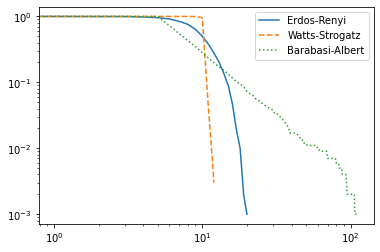

In [17]:
Pker=[float(x)/n for x in nx.degree_histogram(er)]
domEr=range(len(Pker))
fdcaEr=[sum(Pker[k:])for k in domEr]
plt.loglog(domEr,fdcaEr,'-',label='Erdos-Renyi')
Pkws=[float(x)/n for x in nx.degree_histogram(ws)]
domws=range(len(Pkws))
fdcaws=[sum(Pkws[k:])for k in domws]
plt.loglog(domws,fdcaws,'--',label='Watts-Strogatz')
Pkba=[float(x)/n for x in nx.degree_histogram(ba)]
domba=range(len(Pkba))
fdcaba=[sum(Pkba[k:])for k in domba]
plt.loglog(domba,fdcaba,':',label='Barabasi-Albert')
plt.legend()

In [19]:
logkdata=[]
logFdata=[]
prevF=fdcaba[0]

In [21]:
for k in domba:
    F=fdcaba[k]
    if F!=prevF:
        logkdata.append(log(k))
        logFdata.append(log(F))
        prevF=F
        

In [22]:
from scipy import stats as st

In [25]:
a,b,r,p,err=st.linregress(logkdata,logFdata)

In [37]:
print('FDCA estimada: F(k)= ',round(exp(b),2),'k^%f'%a)
print('r=',round(r,2))
print('p-value=',p)

FDCA estimada: F(k)=  31.46 k^-2.018364
r= -0.99
p-value= 8.5310382638854e-43


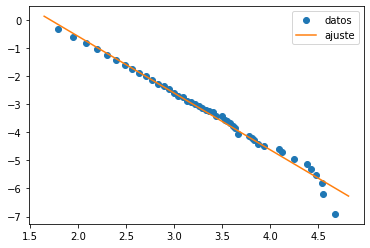

In [40]:
plt.plot(logkdata,logFdata,'o',label='datos')
kmin,kmax=plt.xlim()
plt.plot([kmin,kmax],[a*kmin+b,a*kmax+b],label='ajuste')
plt.legend()